
# **<center><font color="A0D8E9"> Project Akhir Molin </font></center>**
# <center><font color="A0D8E9"> Model Regresi Linier Berganda </font></center>



#<font color="90C796">**Mengimport Library dan Data Ecommerce Customers**</font>

Untuk project pemodelan data kali ini kami menggunakan kembali data pada project 1, yaitu data *Ecommerce Customers* dari sebuah perusahaan *Clothing Store* di kota *New York*

In [ ]:
#Import package yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as ss
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
#Upload file dari link github
link = 'https://raw.githubusercontent.com/Fyodorrrr/E-Commerce/main/Ecommerce%20Customers.csv'
df1 = pd.read_csv(link)
df1.index = range(1, len(df1) + 1)
df1

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
3,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
4,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
5,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
496,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
497,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
498,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
499,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#<font color="90C796">**Pre-Processing Data Ecommerce Customers**</font>


## Drop Kolom

In [ ]:
# Drop kolom yang tidak digunakan dalam pemodelan
df = df1.drop(columns=['Avg. Session Length', 'Email', 'Avatar', 'Address'])
df.head()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,12.655651,39.577668,4.082621,587.951054
2,11.109461,37.268959,2.664034,392.204933
3,11.330278,37.110597,4.104543,487.547505
4,13.717514,36.721283,3.120179,581.852344
5,12.795189,37.536653,4.446308,599.406092


## Pengecekan Missing Value
Dari code di bawah, didapat bahwa dataframe tidak memiliki missing value untuk setiap variabel

In [ ]:
# Pengecekan missing value dari setiap variabel
missing_value = df1.isnull().sum()
missing_value

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Mendeteksi dan Menghapus Outlier

Outlier yang terdeteksi dalam dataframe akan dihapus dengan metode kuantil. Terlihat bahwa kolom 'Yearly Amount Spent' memiliki jumlah outlier paling banyak berdasarkan grafik boxplot.

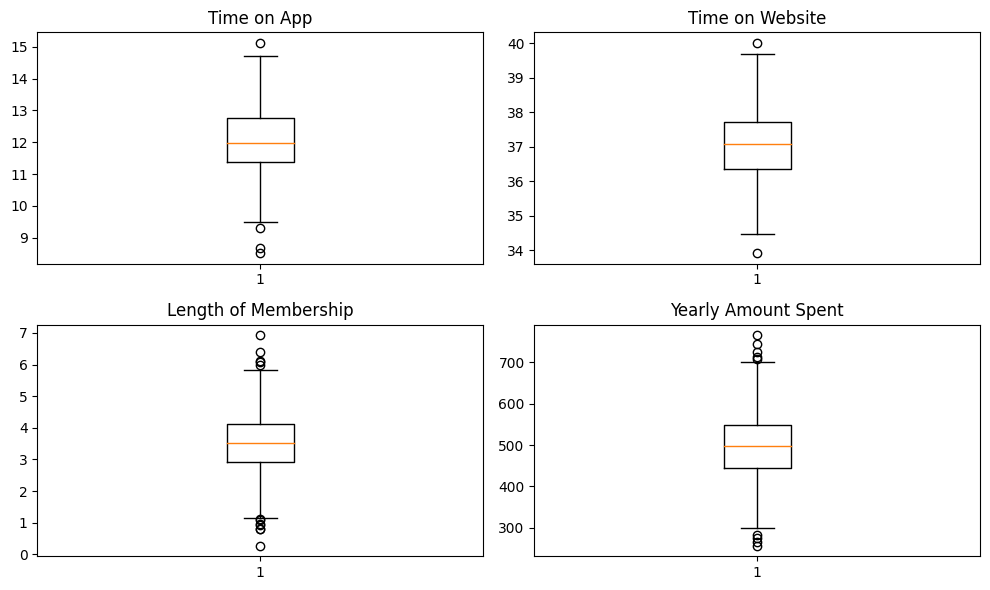

In [ ]:
#Pengecekan outlier dengan menggunakan boxplot
plt.figure(figsize=(10, 6))

# Box plot untuk 'Time on App'
plt.subplot(221)
plt.boxplot(df['Time on App'])
plt.title('Time on App')

# Box plot untuk 'Time on Website'
plt.subplot(222)
plt.boxplot(df['Time on Website'])
plt.title('Time on Website')

# Box plot untuk 'Length of Membership'
plt.subplot(223)
plt.boxplot(df['Length of Membership'])
plt.title('Length of Membership')

# Box plot untuk 'Yearly Amount Spent'
plt.subplot(224)
plt.boxplot(df['Yearly Amount Spent'])
plt.title('Yearly Amount Spent')

plt.tight_layout()
plt.show()

In [ ]:
# detect outlier menggunakan quantil atas dan quantil bawah dan Menghapus outlier

def remove_outliers(df, columns):
    for col in columns:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        df.index = range(1, len(df) + 1)

    return df

remove_outliers_col = ['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

data_clear = remove_outliers(df, remove_outliers_col)
df = data_clear
df

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,12.655651,39.577668,4.082621,587.951054
2,11.109461,37.268959,2.664034,392.204933
3,11.330278,37.110597,4.104543,487.547505
4,13.717514,36.721283,3.120179,581.852344
5,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...
473,13.566160,36.417985,3.746573,573.847438
474,11.695736,37.190268,3.576526,529.049004
475,11.499409,38.332576,4.958264,551.620145
476,12.391423,36.840086,2.336485,456.469510


## Statistika Deskriptif

Kelompok kami melihat nilai maximun, minimum, dan kuantil yang ada di dataframe.

In [ ]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,477.000000,477.000000,477.000000,477.000000
mean,12.063879,37.070254,3.548932,500.508644
std,0.954775,0.993882,0.886519,69.082428
min,9.477778,34.476878,1.200484,319.928870
25%,11.395209,36.366843,2.969640,448.340425
50%,11.982045,37.074371,3.535802,501.122492
75%,12.759169,37.715986,4.113226,548.280320
max,14.715388,39.672591,5.840506,689.787604


In [ ]:
dep_var = df.drop(columns=['Time on App' , 'Time on Website' , 'Length of Membership'])
ind_var = df.drop(columns=['Yearly Amount Spent'])
ind_var = sm.add_constant(ind_var)

# set variabel independen dan dependen  x
dep_varx1 = df.loc[:, ['Yearly Amount Spent']]
ind_varx1 = df.loc[:, ['Time on App']]
ind_varx1 = sm.add_constant(ind_varx1)

# set variabel independen dan dependen  x
dep_varx2 = df.loc[:, ['Yearly Amount Spent']]
ind_varx2 = df.loc[:, ['Time on Website']]
ind_varx2 = sm.add_constant(ind_varx2)

# set variabel independen dan dependen  x
dep_varx3 = df.loc[:, ['Yearly Amount Spent']]
ind_varx3 = df.loc[:, ['Length of Membership']]
ind_varx3 = sm.add_constant(ind_varx3)

#<font color="90C796">**Asumsi-Asumsian**</font>


In [ ]:
#Asumsi error = 0
X = df[['Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
residuals = y_test - predictions

In [ ]:
# #Asumsi error = 0
# X = df1[['Time on App', 'Time on Website', 'Length of Membership', 'Website_App', 'Website_Membership', 'App_Membership', 'App_sqr', 'Website_sqr', 'Membership_sqr']]
# y = df1['Yearly Amount Spent']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# model = LinearRegression()
# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# residuals = y_test - predictions

### Variabel Dependen Berdistribusi Normal

<Figure size 800x500 with 0 Axes>

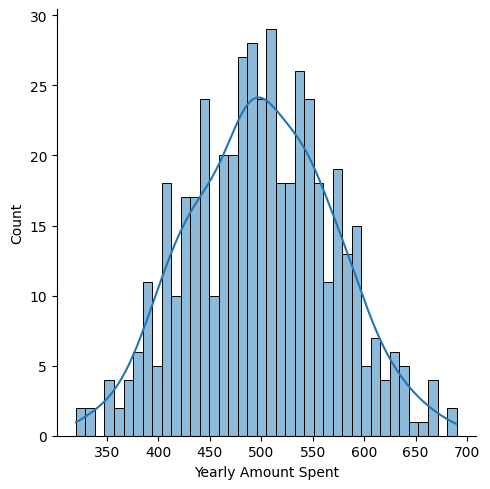

In [ ]:
# Mengecek apakah variabel dependen membentuk distribusi normal atau tidak
plt.figure(figsize=(8,5))
sns.displot(df['Yearly Amount Spent'] , bins=40 , kde=True)

### Asumsi Independensi

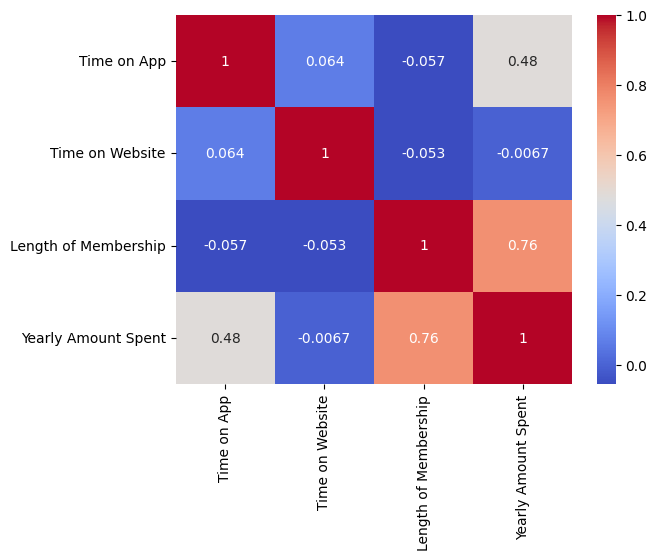

In [ ]:
# Membuat matriks korelasi untuk mengetahui bagaimana korelasi antar dua atribut data
sns.heatmap(df.corr(), annot = True , cmap="coolwarm")
plt.show()

## Asumsi Homoskedastisitas

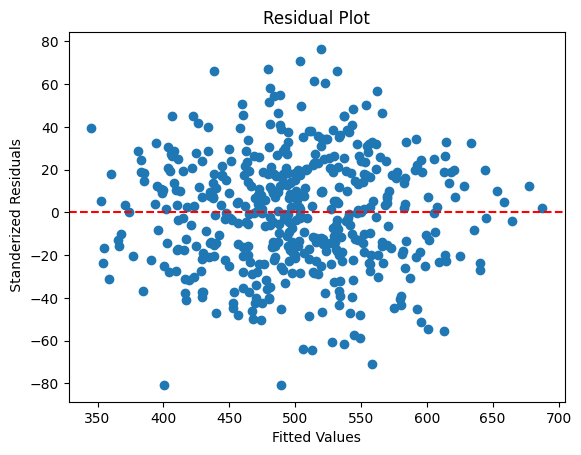

In [ ]:
model = sm.OLS(dep_var, ind_var).fit()
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel(" Standerized Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Asumsi Normalitas
Kami menggunakan residuals plot dan Normal Q-Q plot untuk menunjukan data berdistribusi normal dengan ekspektasi error nya 0 dan variansi konstan

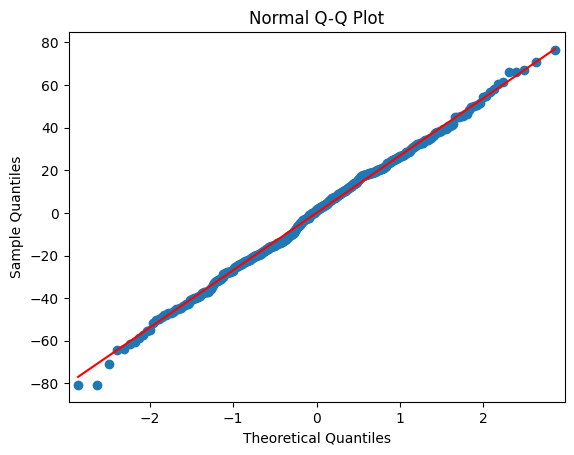

In [ ]:
# Normal Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

<Figure size 800x500 with 0 Axes>

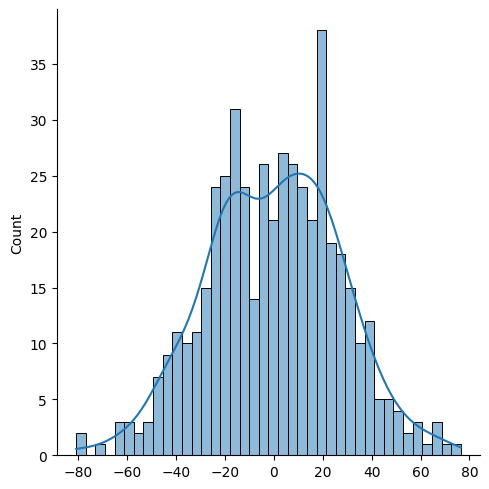

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(model.resid, bins=40 , kde=True)

## Multikolinieritas

In [ ]:
# Mengecek Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()

vif_data["Variable"] = ind_var.columns
vif_data["VIF"] = [variance_inflation_factor(ind_var.values, i) for i in range(ind_var.shape[1])]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

vif_data

,Variable,VIF,Tolerance
0,const,1543.443089,0.000648
1,Time on App,1.007043,0.993006
2,Time on Website,1.006589,0.993454
3,Length of Membership,1.005685,0.994347


 ## Pendugaan Model

Pembuatan pairplot pada data bertujuan untuk mendeteksi adanya multikolinearitas pada data dan mendeteksi apakah ada pengaruh bentuk kuadratik atau kubik dan lainnya yang bisa terjadi.

Dari pairplot, diperoleh bahwa dataset tidak mendeteksi adanya indikasi multikolinearitas antara variabel independen dan hanya terdapat pengaruh model linear yang berpengaruh pada data.

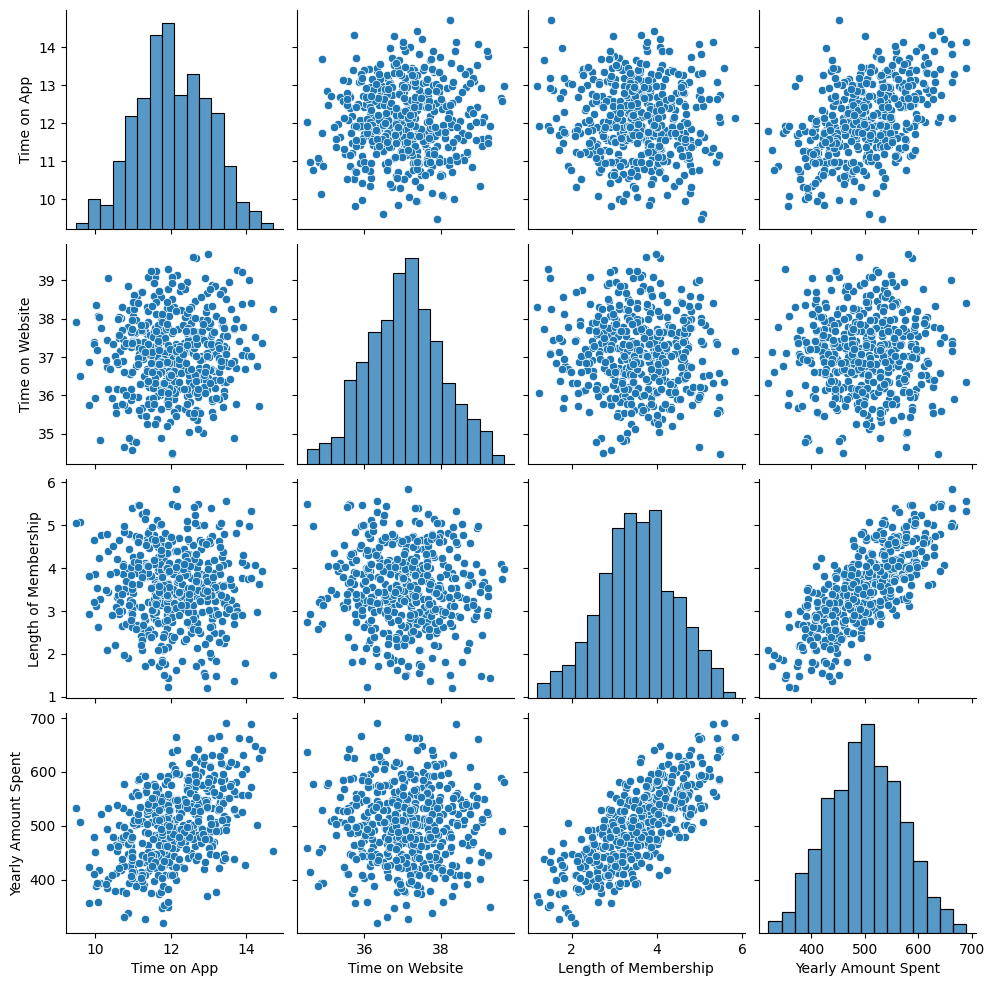

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Time on App,1.000000,0.064242,-0.056854,0.480107
Time on Website,0.064242,1.000000,-0.052753,-0.006746
Length of Membership,-0.056854,-0.052753,1.000000,0.757541
Yearly Amount Spent,0.480107,-0.006746,0.757541,1.000000
